 Name = Mohamed Bassem (2003731)
/ Name = Mina Ehab (2005830)

# Linear Regression Using Different Methods

# 1- Multi-Feature Method "Equation"

In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

#Label Encoding
combined_data = pd.concat([train_data, test_data], axis=0)

categorical_columns = ['name','fuel','seller_type','transmission','owner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

x_train = train_data.drop('selling_price', axis=1)
y_train = train_data['selling_price']
x_test = test_data.drop('selling_price', axis=1)
y_test = test_data['selling_price']

# Add column of ones
x_train['ones'] = 1
x_test['ones'] = 1

x_train_tilda = x_train
x_test_tilda = x_test

# Change to array
x_train_tilda = np.array(x_train_tilda)
x_test_tilda = np.array(x_test_tilda)
y_train =np.array(y_train)
y_test = np.array(y_test)

#Calculate the Betas
betas = np.linalg.inv(x_train_tilda.T @ x_train_tilda) @ x_train_tilda.T @ y_train

#Make pred for x_test
y_pred_test = x_test_tilda @ betas

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = math.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print(mse_test)
print(rmse_test)
print(mae_test)



228601045485.16226
478122.4168402505
305519.9078598263


# 2- Gradient Descent Method "Equation"

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Label Encoding
combined_data = pd.concat([train_data, test_data], axis=0)

categorical_columns = ['name', 'fuel', 'seller_type', 'transmission', 'owner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

train_data = combined_data.iloc[:len(train_data)].copy()
test_data = combined_data.iloc[len(train_data):].copy()

# Standardization of Data
scaler = StandardScaler()

# Standardize the numerical features
numerical_features = ['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']
train_data.loc[:, numerical_features] = scaler.fit_transform(train_data.loc[:, numerical_features])
test_data.loc[:, numerical_features] = scaler.transform(test_data.loc[:, numerical_features])

# Add a column of ones for the bias term
train_data['bias'] = 1
test_data['bias'] = 1

# Extract features and target variable (excluding the 'name' column)
X_train = train_data.drop(['selling_price', 'name'], axis=1)
y_train = train_data['selling_price']
X_test = test_data.drop(['selling_price', 'name'], axis=1)
y_test = test_data['selling_price']

# Gradient Descent
def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    beta = np.zeros(n)
    for i in range(num_iterations):
        y_pred = X.dot(beta)
        error = y_pred - y
        gradient = X.T.dot(error) / m
        beta -= learning_rate * gradient
    return beta

learning_rate = 0.01
num_iterations = 1000

beta = gradient_descent(X_train, y_train, learning_rate, num_iterations)

y_pred = X_test.dot(beta)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mae)


RMSE: 476681.1831978748
MSE: 227224950414.92587
MAE: 303292.3670698837


# Polynomial Regression

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler , LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

average = test_data["selling_price"].mean()
print(average)

504127.3117511521


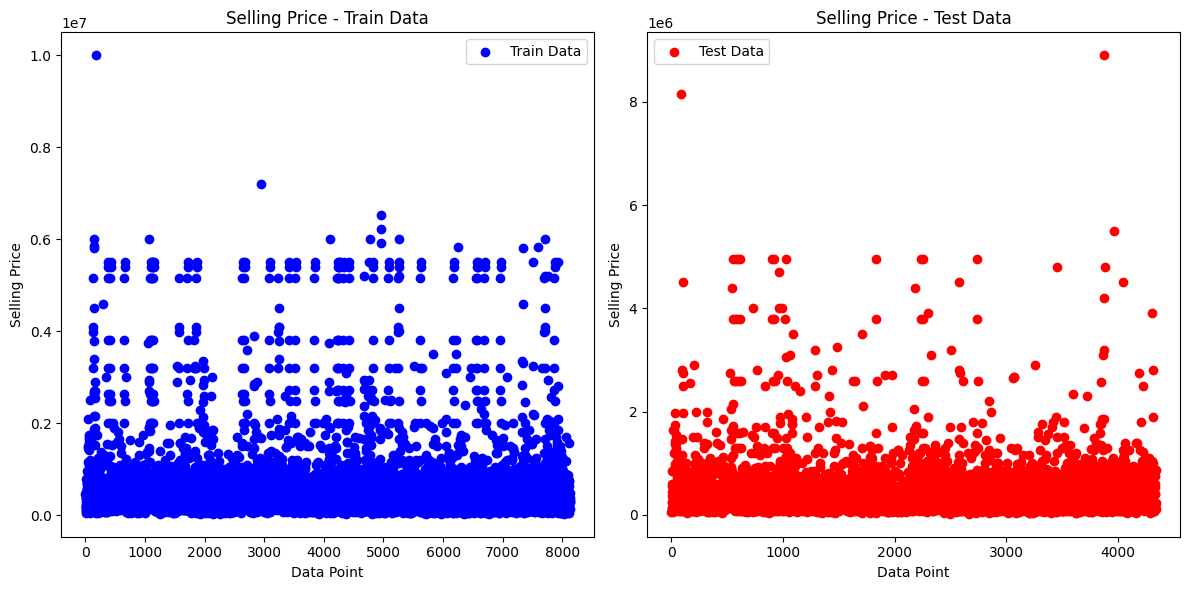

In [18]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(range(len(train_data)), train_data['selling_price'], color='blue', label='Train Data')
plt.xlabel('Data Point')
plt.ylabel('Selling Price')
plt.title('Selling Price - Train Data')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(range(len(test_data)), test_data['selling_price'], color='red', label='Test Data')
plt.xlabel('Data Point')
plt.ylabel('Selling Price')
plt.title('Selling Price - Test Data')
plt.legend()

plt.tight_layout()
plt.show()

1
476679.0629554619
2
428291.3963819987
3
549442.7439362907
4
770555.9991525976
5
13867272.30490688
6
72130888.86764802
7
23410651.79840165
8
53414961.275966786
9
16108724.46496092
10
304835050.0367627
Best degree: 2
RMSE for the best degree: 428291.3963819987


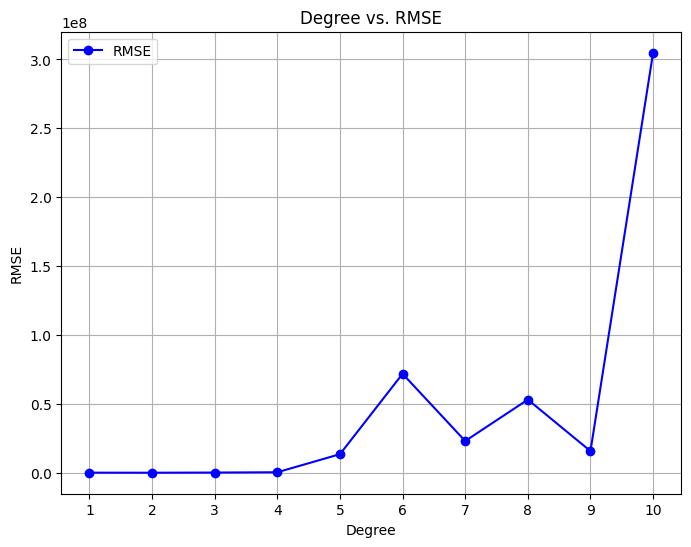

In [20]:
X_train = train_data[['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
y_train = train_data['selling_price']
X_test = test_data[['year','km_driven', 'fuel', 'seller_type', 'transmission', 'owner']]
y_test = test_data['selling_price']

#Label Encoding
combined_data = pd.concat([train_data, test_data], axis=0)

categorical_columns = ['fuel','seller_type','transmission','owner']
label_encoder = LabelEncoder()

for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

train_data = combined_data.iloc[:len(train_data)]
test_data = combined_data.iloc[len(train_data):]

# Create an empty list to store RMSE values for different degrees
rmse_list = []


for degree in range(1, 11):
    print(degree)
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_list.append(rmse)
    print(rmse)

# Find the degree with the lowest RMSE
best_degree = np.argmin(rmse_list) + 1  # Adding 1 to match the degree index
best_rmse = rmse_list[best_degree - 1]  # Getting the RMSE for the best degree

print(f"Best degree: {best_degree}")
print(f"RMSE for the best degree: {best_rmse}")

# Plot the degree vs. RMSE with lines connecting the points
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), rmse_list, marker='o', color='b', label='RMSE', linestyle='-')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('Degree vs. RMSE')
plt.xticks(range(1, 11))
plt.grid(True)
plt.legend()
plt.show()